In [33]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [8]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [12]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [13]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [22]:
mars_df = mars_df.iloc[1:]
mars_df.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0
10,123,2012-08-29,23,162,6,-75.0,741.0
11,134,2012-08-30,24,163,6,-75.0,742.0
12,145,2012-08-31,25,163,6,-75.0,743.0


In [30]:
#Answer the following question: How many months exist on Mars?
month= mars_df['month'].unique().size
print("There are {0} months on Mars".format(month))

There are 12 months on Mars


In [25]:
#Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
martian_days = mars_df['sol'].nunique()
print("There are {0} Martian (And not Earth) days in the scraped dataset.". format(martian_days))

There are 1864 Martian (And not Earth) days in the scraped dataset.


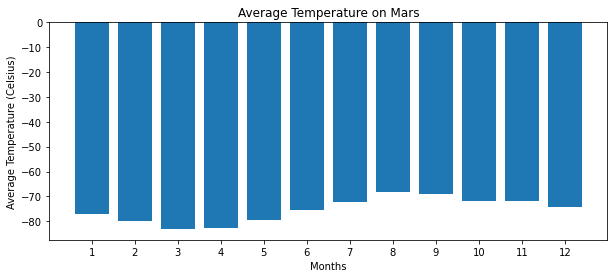

In [35]:
#Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
months_list = []
for month in mars_df["month"]:
    if month not in months_list:
        months_list.append(month)

months_list.sort()

# creating groupby object to aggregate by month
mars_groupby = mars_df.groupby("month")
mean_df = mars_groupby.mean()

# Plot the bar chart
plt.figure(figsize = (10,4))
plt.bar(months_list, mean_df["min_temp"])
plt.xlabel("Months")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Average Temperature on Mars")
plt.xticks(months_list)
plt.show()

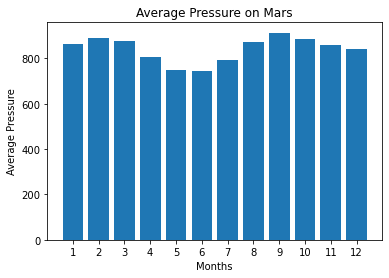

In [41]:
#Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
plt.bar(months_list, mean_df["pressure"])
plt.xlabel("Months")
plt.ylabel("Average Pressure")
plt.title("Average Pressure on Mars")
plt.xticks(months_list)
plt.show()

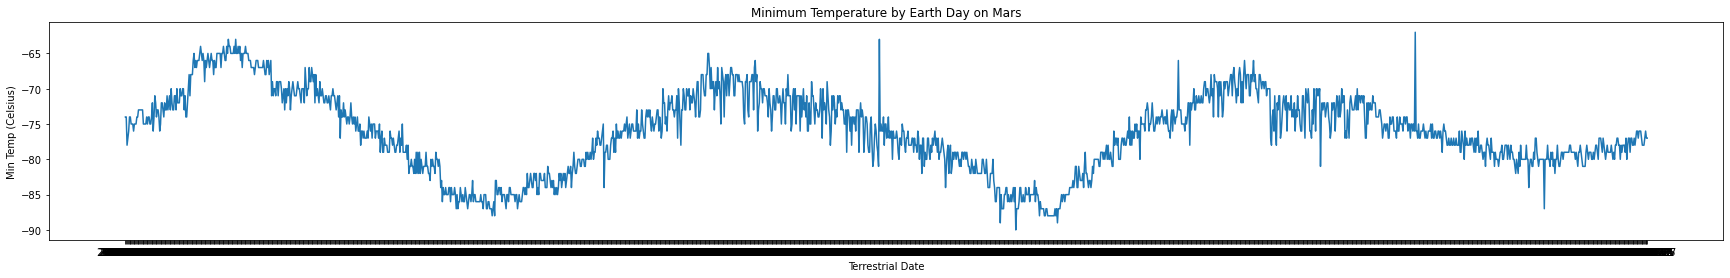

In [42]:
#Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
plt.figure(figsize=(30,4))
plt.plot(mars_df["terrestrial_date"], mars_df["min_temp"])
plt.xlabel("Terrestrial Date")
plt.ylabel("Min Temp (Celsius)")
plt.title("Minimum Temperature by Earth Day on Mars")
plt.show()

In [43]:
mars_df.to_csv("mars_temp_data.csv")